<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-исходных-данных" data-toc-modified-id="Изучение-исходных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение исходных данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Ознакомление-с-данными" data-toc-modified-id="Ознакомление-с-данными-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ознакомление с данными</a></span></li></ul></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Исследование-различных-моделей-с-изменением-их-гиперпараметров" data-toc-modified-id="Исследование-различных-моделей-с-изменением-их-гиперпараметров-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование различных моделей с изменением их гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span><ul class="toc-item"><li><span><a href="#Проверка-точности-обученных-моделей-на-сгенерированных-ответах" data-toc-modified-id="Проверка-точности-обученных-моделей-на-сгенерированных-ответах-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Проверка точности обученных моделей на сгенерированных ответах</a></span></li><li><span><a href="#Использование-эталонного-классификатора" data-toc-modified-id="Использование-эталонного-классификатора-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Использование эталонного классификатора</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект: "Рекомендация тарифов мобильного оператора"

## Описание проекта

__Задача:__  
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».  
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.  
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте `accuracy` на тестовой выборке самостоятельно.

__Ход исследования:__  
1. Изучение исходных данных.
2. Разделение данных на выборки.
3. Исследование различных моделей с изменением их гиперпараметров.
4. Проверка модели на тестовой выборке.
5. Проверка модели на адекватность.
6. Составление общего вывода.

__Описание данных:__  
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* `сalls` — количество звонков,
* `minutes` — суммарная длительность звонков в минутах,
* `messages` — количество sms-сообщений,
* `mb_used` — израсходованный интернет-трафик в Мб,
* `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Изучение исходных данных

Откроем файл с данными и изучим его.

### Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
# чтение файла данных в датафрейм из папки по умолчанию и из рабочей директории
try:
    df = pd.read_csv('/datasets/users_behavior.csv', sep=',')
except:
    df = pd.read_csv('users_behavior.csv', sep=',')

### Ознакомление с данными

In [3]:
# получение первых 10 строк таблицы df
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# получение статистики по данным  в таблице df
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
# корреляция признаков
df.corr().style.background_gradient(cmap='coolwarm')

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


In [7]:
# соотношение классов в целевой переменной
is_ultra_class = round(df['is_ultra'].sum() / len(df), 3)
print(f'Доля пользователей с тарифом «Ультра»: {is_ultra_class}, «Смарт»: {1 - is_ultra_class}')

Доля пользователей с тарифом «Ультра»: 0.306, «Смарт»: 0.694


__Результаты первичных наблюдений:__  
Данные содержат информацию об параметрах услуг мобильной связи, оказанной отдельным клиентам оператора мобильной сети «Мегалайн» в рамках своих тарифных планов. В столбцах - данные о количестве звонков, продолжительности телефонных разговоров, количестве смс-сообщений и о потребленном интернет-трафике. Все данные имеют числовой тип и будут использоваться в качестве предсказательных признаков. В качестве идентификаторов пользователей выступают индексы сток. Последний столбец содержит данные о типах тарифов пользователей - эта наш целевой признак.  
Классы в целевом признаке не сбалансированы - преобладает тариф «Смарт». Чтобы избежать мероприятий по перебалансировке данных, стоит использовать модели, устойчивые к данному фактору - решающие деревья или логистическую регрессию.  
Данные не содержат пропусков, дубликатов, выбросов, аномалий и не нуждаются в дополнительной обработке.  
Между двумя признаками - `calls` и `minutes` обнаружена сильная линейная зависимость. Она носит не функциональный характер, то есть - это частичная мультиколлинеарность и она может влиять на устойчивость оценок исследуемых моделей. При этом корреляция настолько высока, что позволяет нам отказаться от одного из признаков.

## Разделение данных на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки.

In [8]:
# выделение предсказательных и целевого признаков
features = df.drop(['calls', 'is_ultra'], axis=1)
target = df['is_ultra']

In [9]:
# выделение тестовой выборки
X, X_test, y, y_test  = train_test_split(features, target, test_size=0.2, stratify=target, random_state=12345)
# выделение обучающей и валидационной выборок
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.2, stratify=y, random_state=12345)

Данные были поделены на три выборки - обучающую, валидационную и тестовую в отношении 3:1:1. Выборки стратифицированы по целевой переменной.  Из признаков был исключен `calls`, имеющий очень сильную линейную зависимость с `minutes`.

## Исследование различных моделей с изменением их гиперпараметров

Исследуем качество разных моделей, меняя гиперпараметры. Кратко напишем выводы исследования.

### Решающее дерево

In [10]:
# подбор гиперпараметоров модели решающего дерева
dt_best_model = None
dt_best_result = 0
dt_score_train = []
dt_score_val = []
# подбор глубины дерева
for depth in range(1, 20):
    # модель и обучение
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(X_train, y_train)
    dt_score_train.append(model.score(X_train, y_train))
    # расчет точности на валидационной выборке
    result = model.score(X_val, y_val)
    dt_score_val.append(result)
    # определение лучшей модели
    if result > dt_best_result:
        dt_best_model = model
        dt_best_result = result
        
print("Accuracy лучшей модели:", dt_best_result)
print(dt_best_model)

Accuracy лучшей модели: 0.8116504854368932
DecisionTreeClassifier(max_depth=5, random_state=12345)


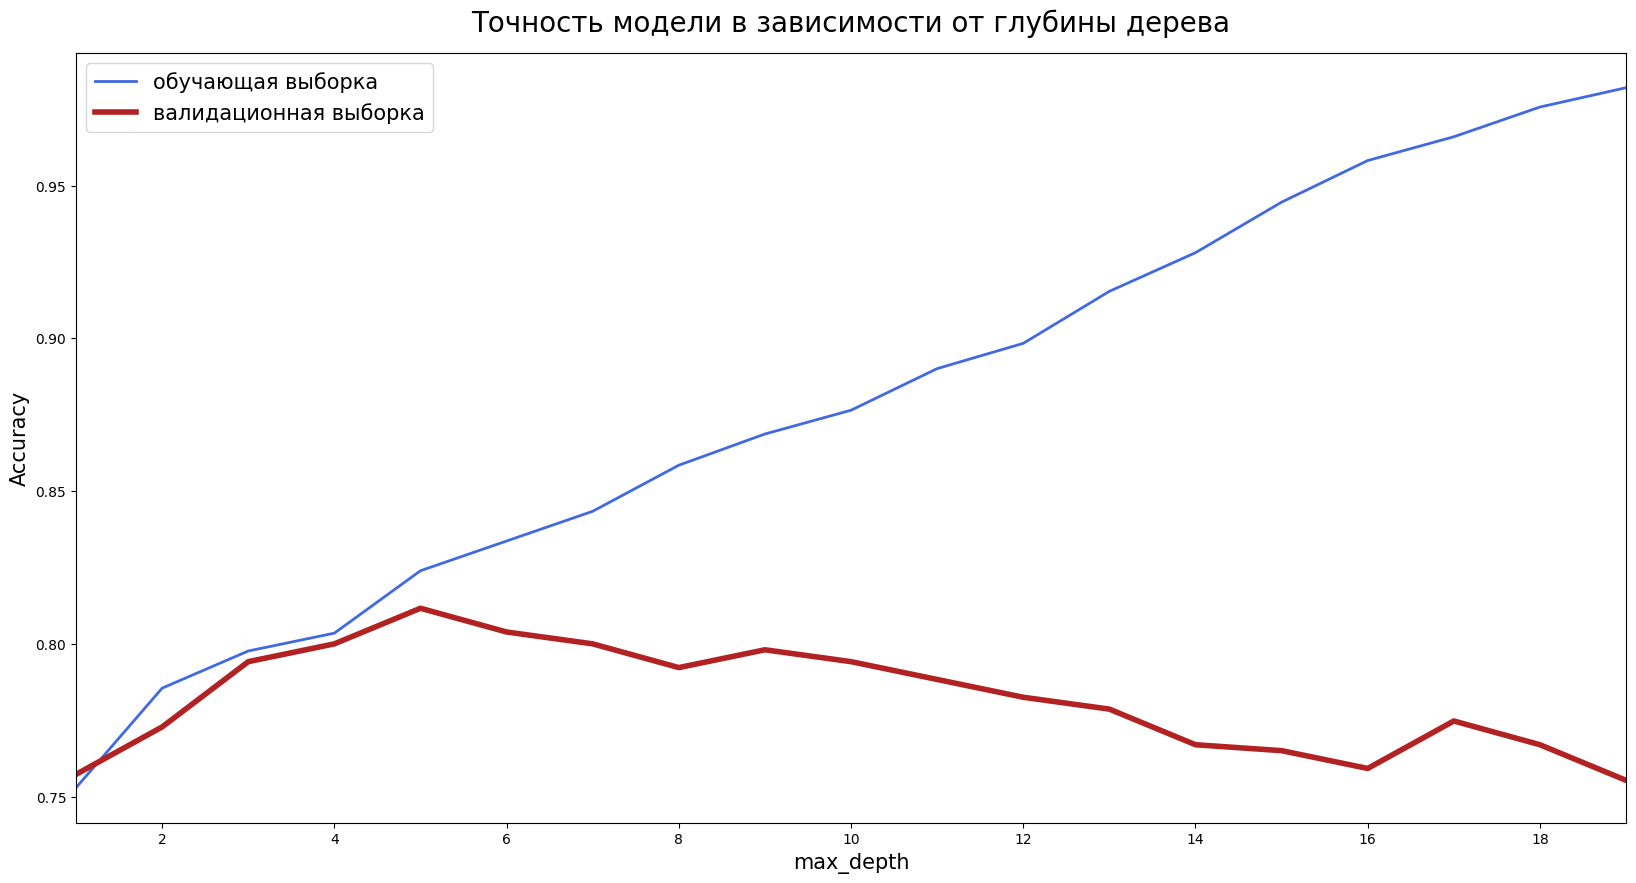

In [11]:
dt_scale = [i for i in range(1,20)]
# график зависимости точности модели от глубины дерева
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(dt_scale, dt_score_train, label='обучающая выборка', c='RoyalBlue', lw=2)
ax.plot(dt_scale, dt_score_val, label='валидационная выборка', c='FireBrick', lw=4)
ax.set_title('Точность модели в зависимости от глубины дерева', fontsize=20, pad=15)
ax.set_xlabel('max_depth', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim([1, 19])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show();

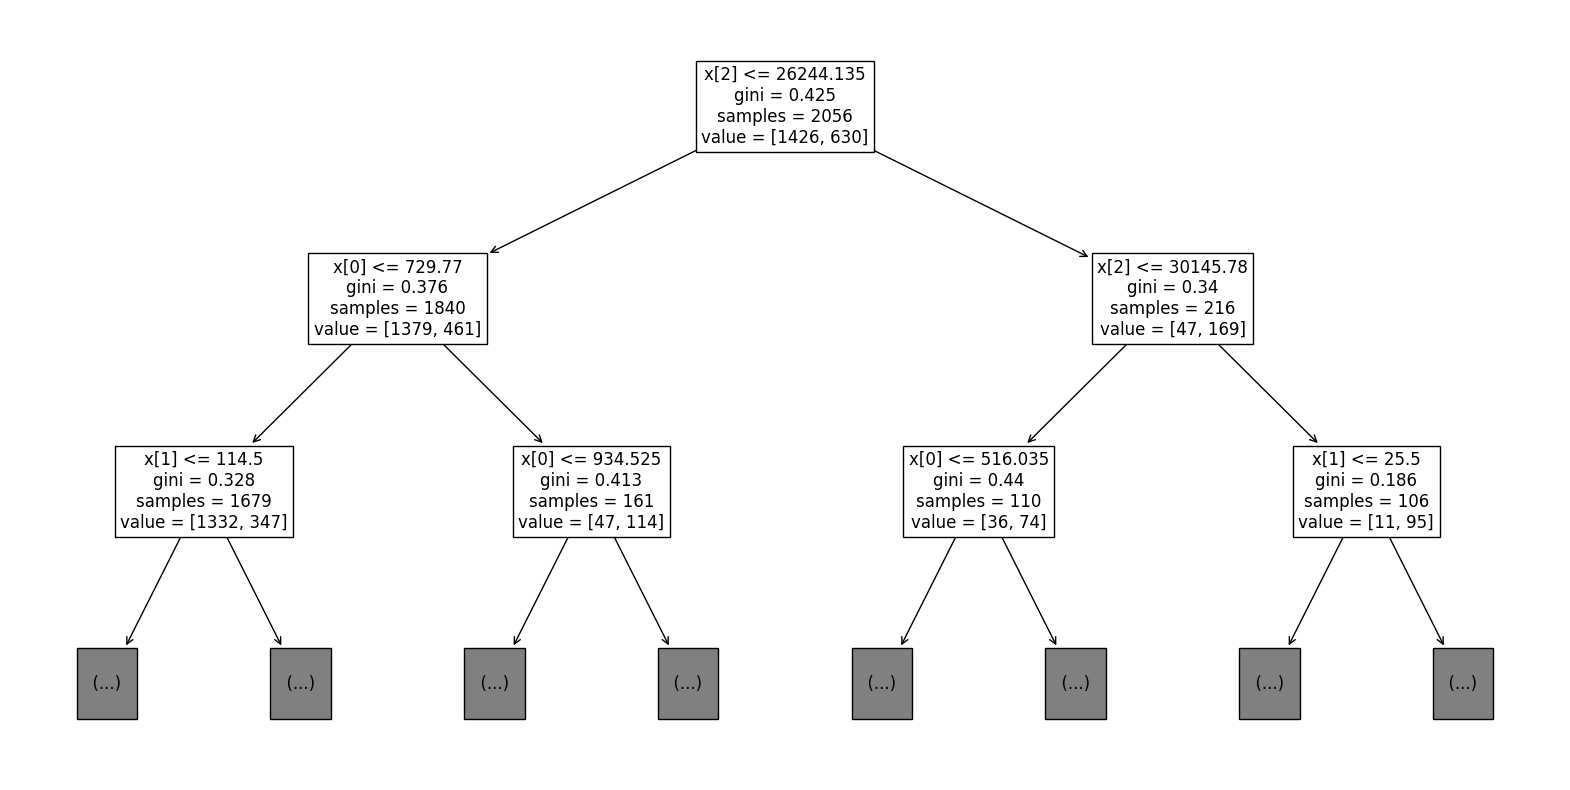

In [12]:
# диаграмма решающего дерева
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_best_model, max_depth=2, fontsize=12)
plt.show();

### Случайный лес

In [13]:
# подбор гиперпараметоров модели случайного леса
rf_best_model = None
rf_best_result = 0
# списки для построения графика
rf_best_depth = 0
est_score_train = []
est_score_val = []
# подбор глубины дерева
for depth in range(1, 11):
    score_train = []
    score_val = []
    # подбор кол-ва деревьев
    for est in range(1, 50):
        # модель и обучение
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(X_train, y_train)
        score_train.append(model.score(X_train, y_train))
        # расчет точности на валидационной выборке
        result = model.score(X_val, y_val)
        score_val.append(result)
        # определение лучшей модели
        if result > rf_best_result:
            rf_best_model = model
            rf_best_result = result
            rf_best_depth = depth
    # запись списков для лучшей гдубины дерева
    if depth == rf_best_depth:        
        est_score_train = score_train.copy()
        est_score_val = score_val.copy()
        
print("Accuracy лучшей модели:", rf_best_result)
print(rf_best_model)

Accuracy лучшей модели: 0.8233009708737864
RandomForestClassifier(max_depth=7, n_estimators=28, random_state=12345)


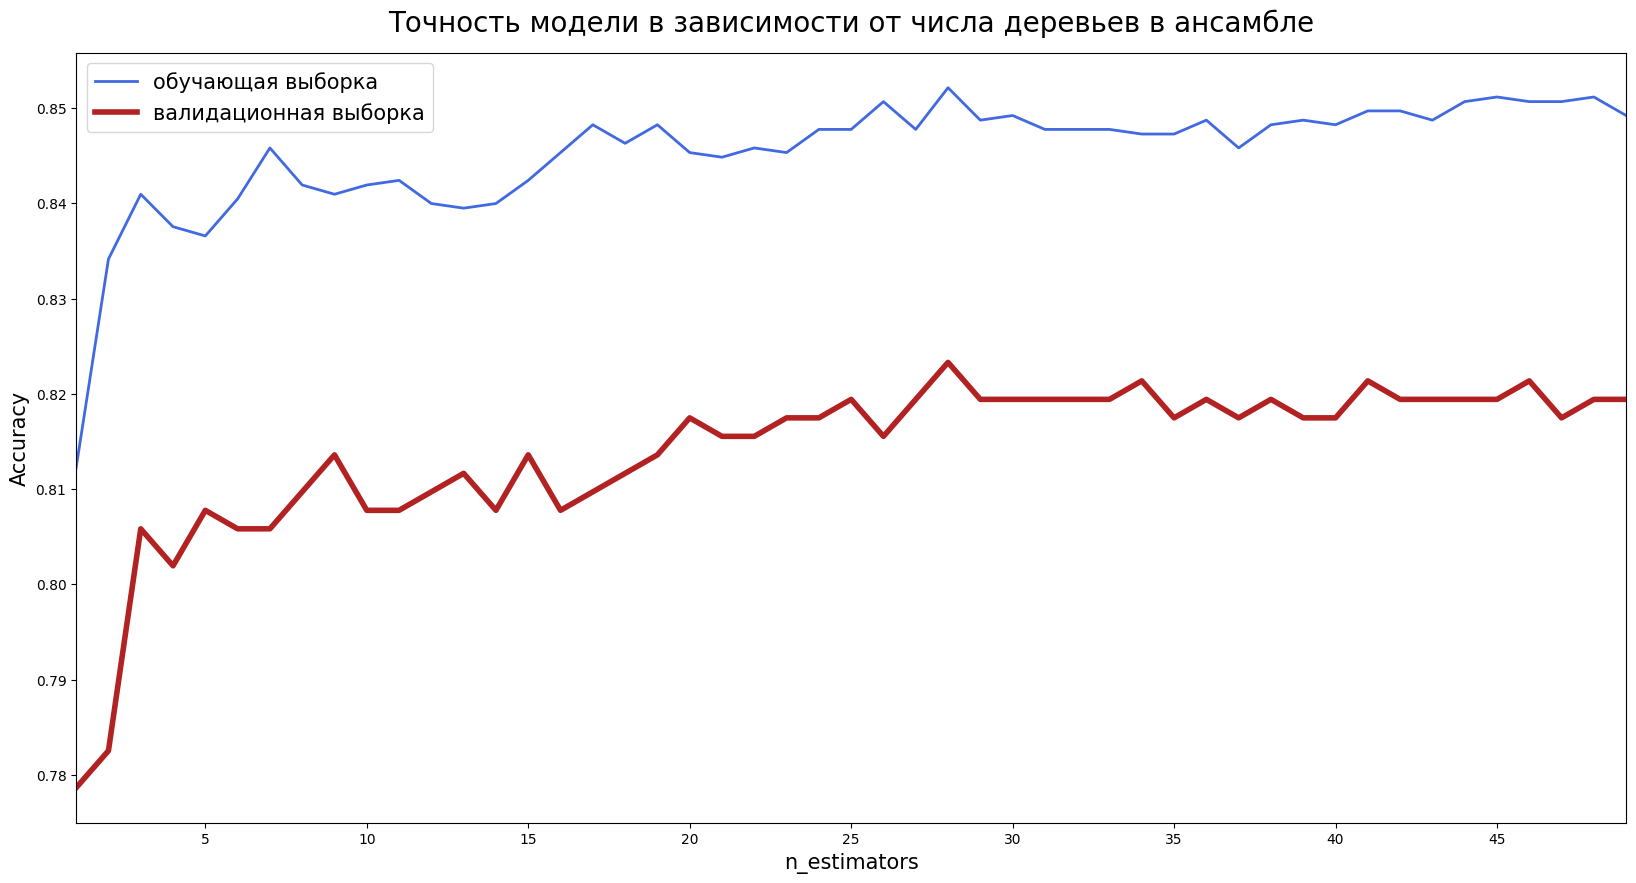

In [14]:
rf_scale = [i for i in range(1,50)]
# график зависимости точности модели от числа деревьев
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(rf_scale, est_score_train, label='обучающая выборка', c='RoyalBlue', lw=2)
ax.plot(rf_scale, est_score_val, label='валидационная выборка', c='FireBrick', lw=4)
ax.set_title('Точность модели в зависимости от числа деревьев в ансамбле', fontsize=20, pad=15)
ax.set_xlabel('n_estimators', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim([1, 49])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show();

### Логистическая регрессия

In [28]:
# подбор гиперпараметоров модели случайного леса
lr_best_model = None
lr_best_result = 0
# подбор солвера
for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    # модель и обучение
    model = LogisticRegression(solver=solver, max_iter=5000, random_state=12345)
    model.fit(X_train, y_train)
    # расчет точности на валидационной выборке
    result = model.score(X_val, y_val)
    # определение лучшей модели
    if result > lr_best_result:
        lr_best_model = model
        lr_best_result = result
            
print("Accuracy лучшей модели:", lr_best_result)
print(lr_best_model)

C:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy лучшей модели: 0.7456310679611651
LogisticRegression(max_iter=5000, random_state=12345, solver='newton-cg')


__Результаты исследования моделей машинного обучения:__  
В проекте решается задача бинарной классификации и были выбраны для исследования три модели машинного обучения: решающее дерево, случайный лес и логистическая регрессия. Для каждой был проведен подбор одного или двух гиперпараметров.  Качество модели определялось на основе метрики `accuracy`. Наибольшую точность на валидационной выборке показала модель случайного леса - 82% верно предсказанных прогнозов. При этом обе модели на основе деревьев показали точность выше минимально необходимой.

## Проверка модели на тестовой выборке

Проверим качество лучшей модели на тестовой выборке.

In [16]:
# расчет точности лучшей модели на тестовой выборке
print("Accuracy выбранной модели случайного леса:", rf_best_model.score(X_test, y_test))

Accuracy выбранной модели случайного леса: 0.8102643856920684


Для выбранной нами модели случайного леса точность на тестовой выборке оказалась немного ниже, чем на валидационной. Однако, точность модели по-прежнему превышает минимально допустимое.

## Проверка модели на адекватность

Проверим модели на вменяемость, сравнив их точность с допустимым базовым уровнем.

### Проверка точности обученных моделей на сгенерированных ответах

In [17]:
# расчет точности лучших моделей на тестовой выборке и случайных ответах
y_test_shuffled = y_test.sample(frac=1, replace=True, random_state=1)
print("Accuracy выбранной модели решающего дерева для случайных данных:", dt_best_model.score(X_test, y_test_shuffled))
print("Accuracy выбранной модели случайного леса для случайных данных:", rf_best_model.score(X_test, y_test_shuffled))
print("Accuracy выбранной модели логистической регрессии для случайных данных:", lr_best_model.score(X_test, y_test_shuffled))

Accuracy выбранной модели решающего дерева для случайных данных: 0.6827371695178849
Accuracy выбранной модели случайного леса для случайных данных: 0.6749611197511665
Accuracy выбранной модели логистической регрессии для случайных данных: 0.7013996889580093


### Использование эталонного классификатора

In [18]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=12345)
dummy_model.fit(X_train, y_train)
print("Accuracy эталонного классификатора:", dummy_model.score(X_test, y_test))

Accuracy эталонного классификатора: 0.6936236391912908


__Результат проверки моделей на адекватность:__  
В случае, если бы бинарный классификатор предсказывал абсолютно случайным образом, то значение `accuracy` для него стремилось бы к 0.5. Если же классификатор прошел обучение на обучающей выборке и классы целевой переменной разного размера, то в предсказаниях будет преобладать какой-то один класс. Мы использовали это предположение и сделали оценки точности для моделей на сгенерированных ответах. А также задействовали включенный в библиотеку `scikit-learn` классификатор `DummyClassifier`, который при использовании стратегии `most_frequent` всегда предсказывает наиболее частую метку в обучающем наборе.  
Полученные значения `accuracy` лежат в пределах 0.6-0.7 и это меньше, чем полученных нами точность настроенных моделей. Значит наши модели прошли проверку на адекватность. 

## Общий вывод

В процессе решения задачи проекта были исследованы три модели классификации решающее дерево, случайный лес и логистическая регрессия. Качество моделей определялась значением метрики `accuracy`. Для моделей были подобраны оптимальные гиперпараметры. Модели были проверены на адекватность. По итогам сравнения наибольшее значение точности показала модель случайного леса
глубиной 7 из 28 деревьев с `accuracy` равной 0.79, что превысило минимально допустимую точность в 0.75. Ее и можно рекомендовать в качестве искомой модели классификатора для решения задачи проекта.